**Sales Analysis and Dashboard Creation**

**Objective**

- Analyze Q4 sales performance by product categories, individual products, monthly trends, customers, and employees.
- Identify key insights and suggest actionable recommendations.
- Create an interactive dashboard to effectively showcase the findings.

**Dataset**

I will use a dataset obtained from the open-source Northwind.db database. The dataset is stored in a file named "data_sale_q4.csv".

**Project Workflow**

Step 1: Import and Load the Dataset

Goal: Load the dataset and understand its structure.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("data_sale_q4.csv")
print(df)

      OrderDate         CustomerName           ContactName         City  \
0    1996-10-01       Island Trading         Helen Bennett        Cowes   
1    1996-10-01       Island Trading         Helen Bennett        Cowes   
2    1996-10-02  Tortuga Restaurante  Miguel Angel Paolino  México D.F.   
3    1996-10-02  Tortuga Restaurante  Miguel Angel Paolino  México D.F.   
4    1996-10-02  Tortuga Restaurante  Miguel Angel Paolino  México D.F.   
..          ...                  ...                   ...          ...   
215  1996-12-30   Save-a-lot Markets        Jose Pavarotti        Boise   
216  1996-12-31         Vaffeljernet           Palle Ibsen        Århus   
217  1996-12-31         Vaffeljernet           Palle Ibsen        Århus   
218  1996-12-31         Vaffeljernet           Palle Ibsen        Århus   
219  1996-12-31         Vaffeljernet           Palle Ibsen        Århus   

     Country PostalCode                      ProductName    CategoryName  \
0         UK   PO31 7PJ

In [3]:
# Overview of data
df.head()
df.info()
df.describe()

    OrderDate         CustomerName           ContactName         City Country  \
0  1996-10-01       Island Trading         Helen Bennett        Cowes      UK   
1  1996-10-01       Island Trading         Helen Bennett        Cowes      UK   
2  1996-10-02  Tortuga Restaurante  Miguel Angel Paolino  México D.F.  Mexico   
3  1996-10-02  Tortuga Restaurante  Miguel Angel Paolino  México D.F.  Mexico   
4  1996-10-02  Tortuga Restaurante  Miguel Angel Paolino  México D.F.  Mexico   

  PostalCode                      ProductName  CategoryName  Price  Quantity  \
0   PO31 7PJ  Jack's New England Clam Chowder       Seafood   9.65        20   
1   PO31 7PJ                     Lakkalikööri     Beverages  18.00         6   
2       5033                     Alice Mutton  Meat/Poultry  39.00         8   
3       5033                Rössle Sauerkraut       Produce  45.60        14   
4       5033                     Lakkalikööri     Beverages  18.00        30   

   total_spent        employee  

,Price,Quantity,total_spent
count,220.000000,220.000000,220.000000
mean,30.519500,25.786364,806.426864
std,40.662458,19.445388,1356.932630
min,2.500000,4.000000,20.000000
25%,12.500000,11.500000,178.800000
50%,19.750000,20.000000,456.000000
75%,34.000000,35.000000,871.250000
max,263.500000,120.000000,13175.000000


Step 2: Data Cleaning

Goal: Clean the dataset for missing values, duplicates, and incorrect data types.

In [4]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values
df["PostalCode"] = df["PostalCode"].fillna("Unknown")
print(df.isnull().sum())

# Convert "OrderDate" to datetime
df["OrderDate"] = pd.to_datetime(df["OrderDate"])
print(df.dtypes)

# Create column for month
df["month"] = df["OrderDate"].dt.month

# Check and remove duplicates
print(f"Duplicates: {df.duplicated().sum()}")
df = df.drop_duplicates()

print(df)

OrderDate        0
CustomerName     0
ContactName      0
City             0
Country          0
PostalCode      10
ProductName      0
CategoryName     0
Price            0
Quantity         0
total_spent      0
employee         0
dtype: int64
OrderDate       0
CustomerName    0
ContactName     0
City            0
Country         0
PostalCode      0
ProductName     0
CategoryName    0
Price           0
Quantity        0
total_spent     0
employee        0
dtype: int64
OrderDate       datetime64[ns]
CustomerName            object
ContactName             object
City                    object
Country                 object
PostalCode              object
ProductName             object
CategoryName            object
Price                  float64
Quantity                 int64
total_spent            float64
employee                object
dtype: object
Duplicates: 0
     OrderDate         CustomerName           ContactName         City  \
0   1996-10-01       Island Trading         Helen Bennet

Step 3: Exploratory Data Analysis (EDA)

Questions to Answer:

- Which product categories generated the highest sales in Q4?
- Which products achieved the highest sales in Q4?
- Which month had the highest sales during Q4?
- Which customers spent the most in Q4?
- Which employees contributed the most to sales in Q4?

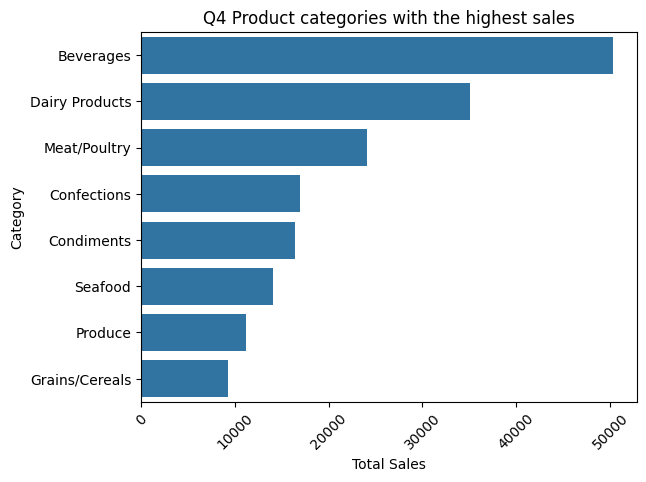

In [5]:
# Q4 Product categories with the highest sales
cat_sales = df.groupby("CategoryName")["total_spent"].sum().sort_values(ascending=False)
sns.barplot(x=cat_sales.values, y=cat_sales.index)
plt.title("Q4 Product categories with the highest sales")
plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.xticks(rotation=45)
plt.show()

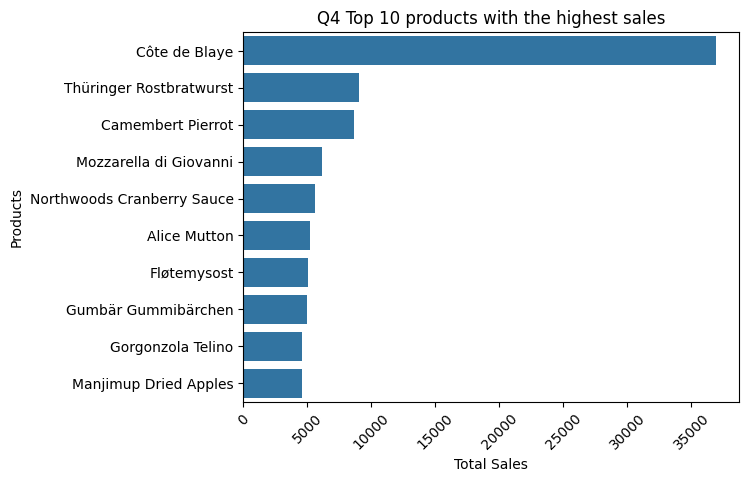

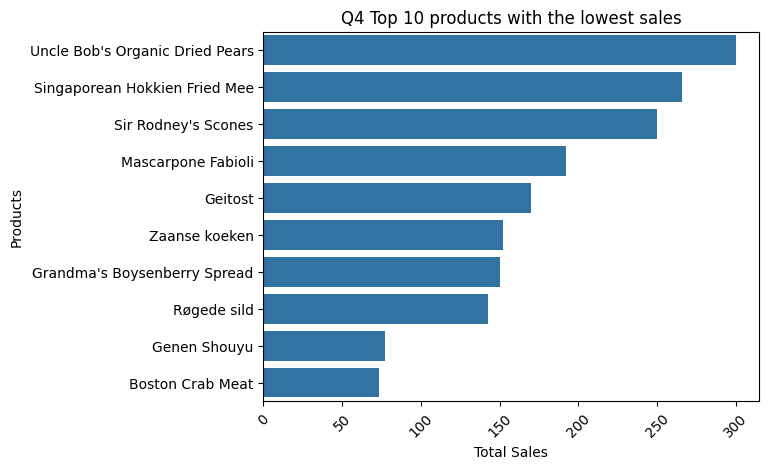

In [6]:
# Q4 Top 10 products with the highest sales
pro_top_10 = df.groupby("ProductName")["total_spent"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=pro_top_10.values, y=pro_top_10.index)
plt.title("Q4 Top 10 products with the highest sales")
plt.xlabel("Total Sales")
plt.ylabel("Products")
plt.xticks(rotation=45)
plt.show()

# Q4 Top 10 products with the lowest sales
pro_low_10 = df.groupby("ProductName")["total_spent"].sum().sort_values(ascending=False).tail(10)
sns.barplot(x=pro_low_10.values, y=pro_low_10.index)
plt.title("Q4 Top 10 products with the lowest sales")
plt.xlabel("Total Sales")
plt.ylabel("Products")
plt.xticks(rotation=45)
plt.show()

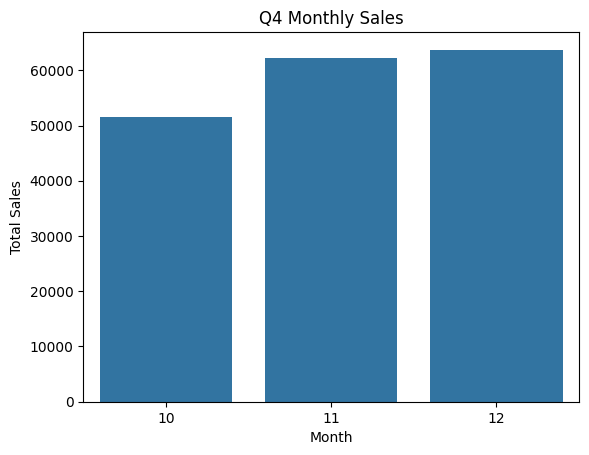

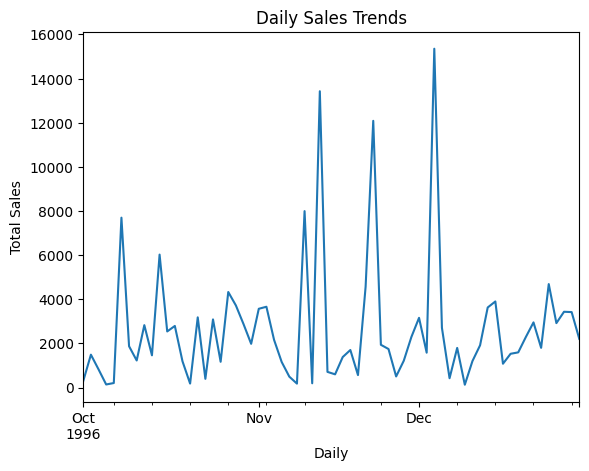

In [7]:
# Q4 Monthly Sales
monthly_sales = df.groupby("month")["total_spent"].sum()
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Q4 Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# Q4 Daily Sales
daily_trend= df.groupby("OrderDate")["total_spent"].sum()
daily_trend.plot(kind='line', title="Daily Sales Trends")
plt.xlabel("Daily")
plt.ylabel("Total Sales")
plt.show()

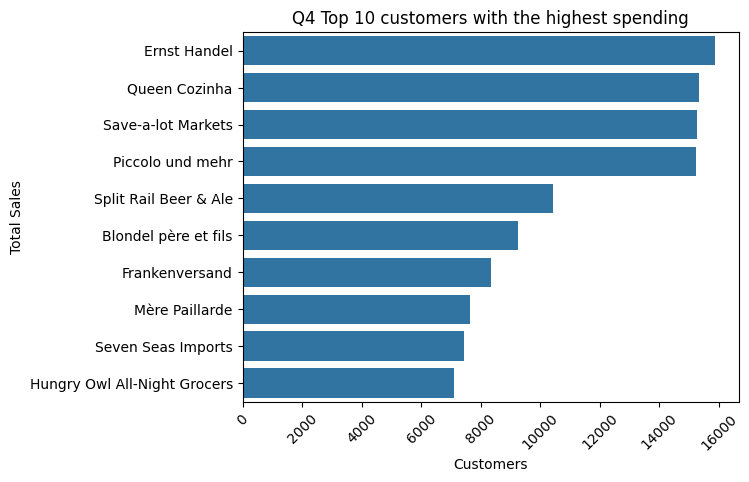

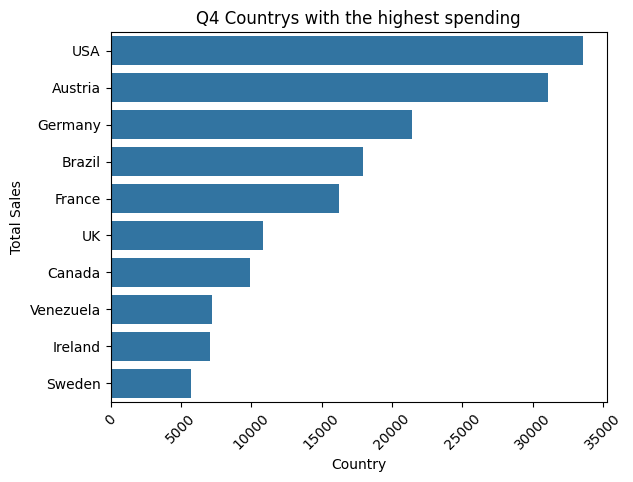

In [8]:
# Q4 Top 10 customers with the highest spending
most_spent = df.groupby("CustomerName")["total_spent"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=most_spent.values, y=most_spent.index)
plt.title("Q4 Top 10 customers with the highest spending")
plt.xlabel("Customers")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# Q4 Countrys with the highest spending
c_most_spent = df.groupby("Country")["total_spent"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=c_most_spent.values, y=c_most_spent.index)
plt.title("Q4 Countrys with the highest spending")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

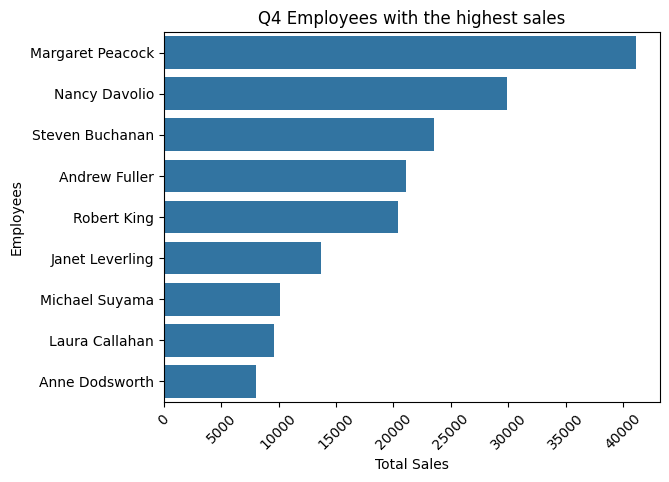

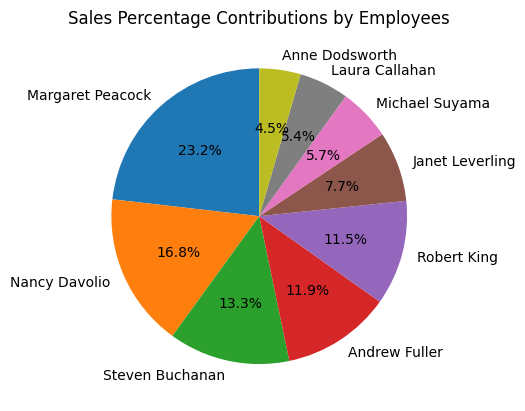

In [9]:
# Q4 Employees with the highest sales
emp_sales = df.groupby("employee")["total_spent"].sum().sort_values(ascending=False)
sns.barplot(x=emp_sales.values, y=emp_sales.index)
plt.title("Q4 Employees with the highest sales")
plt.xlabel("Total Sales")
plt.ylabel("Employees")
plt.xticks(rotation=45)
plt.show()

# Sales Percentage Contributions by Employees
plt.pie(emp_sales.values, labels=emp_sales.index, autopct='%1.1f%%', startangle=90)
plt.title("Sales Percentage Contributions by Employees")
plt.show()

Step 4: Insights and Recommendations

Key Findings:

- Product Category Insights: The category with the highest sales is "Beverages", while "Grains/Cereals" recorded the lowest sales.
- Product Insights: The top-selling product is "Côte de Blaye", while "Boston Crab Meat" generated the lowest sales.
- Seasonal Insights: December had the highest monthly sales.
- Seasonal Trends: Sales peaked at the beginning of December, reflecting strong seasonal demand during the holiday preparation period.
- Customer Insights: The customer with the highest spending is "Ernst Handel", and USA is the country with the highest spending.
- Employee Insights: The top-performing employee is "Margaret Peacock", contributing 23.2% of total Q4 sales.


Recommendations:

- Focus marketing campaigns on top-selling products to maintain and enhance their sales performance.
- Introduce promotions for Grains/Cereals to boost sales and improve performance in this category.
- Increase stock levels and offer discounts during the holiday season to meet higher demand and maximize sales.
- Offer a discount to Ernst Handel to reward its high spending and provide a positive experience for continued business.
- Provide a bonus and award to Margaret Peacock to recognize her outstanding performance and encourage continued excellence.

Step 5: Export the CSV file for creating the dashboard
- Export the CSV file for creating the interactive dashboard using Tableau.

In [10]:
df.to_csv("edited_data_sale_q4.csv", index=False)